In [1]:
%pip install gensim
%pip install scipy

import json
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import os 
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import silhouette_score
import gensim.downloader as api
from scipy.sparse import hstack

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [109]:
df = pd.read_csv("2_data_combined.csv")

In [27]:
df.shape

(90271, 6)

In [28]:
list(df.columns)

['Year',
 'Title',
 'PublicationName',
 'CitedByCount',
 'AffiliationCountry',
 'AuthorKeywords']

In [110]:
country_to_continent = {
    "Sweden": "Europe", "South Africa": "Africa", "Armenia": "Asia", "Netherlands": "Europe",
    "Maldives": "Asia", "Macao": "Asia", "Slovenia": "Europe", "Barbados": "North America",
    "Bangladesh": "Asia", "Mexico": "North America", "Taiwan": "Asia", "Georgia": "Asia",
    "Bhutan": "Asia", "South Sudan": "Africa", "Congo": "Africa", "Algeria": "Africa",
    "Belize": "North America", "Zimbabwe": "Africa", "Iran": "Asia", "Hungary": "Europe",
    "Latvia": "Europe", "Belgium": "Europe", "Denmark": "Europe", "Italy": "Europe",
    "Albania": "Europe", "Iceland": "Europe", "Democratic Republic Congo": "Africa",
    "Botswana": "Africa", "Monaco": "Europe", "Mauritius": "Africa", "Guatemala": "North America",
    "Madagascar": "Africa", "Somalia": "Africa", "Togo": "Africa", "Reunion": "Africa",
    "Bulgaria": "Europe", "El Salvador": "North America", "Sri Lanka": "Asia",
    "South Korea": "Asia", "Sudan": "Africa", "Kyrgyzstan": "Asia", "Brunei Darussalam": "Asia",
    "North Macedonia": "Europe", "Bahamas": "North America", "Qatar": "Asia", "Timor-Leste": "Asia",
    "United States": "North America", "Bahrain": "Asia", "Mali": "Africa", "Angola": "Africa",
    "Namibia": "Africa", "India": "Asia", "Venezuela": "South America", "Russian Federation": "Europe",
    "Viet Nam": "Asia", "Canada": "North America", "Cuba": "North America", "Ireland": "Europe",
    "Panama": "North America", "Oman": "Asia", "Senegal": "Africa", "Montenegro": "Europe",
    "Guinea-Bissau": "Africa", "Seychelles": "Africa", "Yemen": "Asia", "Peru": "South America",
    "Pakistan": "Asia", "Chad": "Africa", "Finland": "Europe", "Paraguay": "South America",
    "Yugoslavia": "Europe", "Azerbaijan": "Asia", "Tunisia": "Africa", "Kazakhstan": "Asia",
    "Moldova": "Europe", "Austria": "Europe", "Malaysia": "Asia", "Rwanda": "Africa",
    "Hong Kong": "Asia", "Cameroon": "Africa", "Papua New Guinea": "Oceania",
    "Czech Republic": "Europe", "Cambodia": "Asia", "Gabon": "Africa", "Niger": "Africa",
    "Portugal": "Europe", "Switzerland": "Europe", "New Zealand": "Oceania", "Singapore": "Asia",
    "Trinidad and Tobago": "North America", "Syrian Arab Republic": "Asia", "Jordan": "Asia",
    "France": "Europe", "Cote d'Ivoire": "Africa", "Eritrea": "Africa", "Argentina": "South America",
    "United Arab Emirates": "Asia", "Sierra Leone": "Africa", "Uruguay": "South America",
    "China": "Asia", "Burundi": "Africa", "Cape Verde": "Africa", "Myanmar": "Asia",
    "Egypt": "Africa", "Unknown": "Unknown", "Nicaragua": "North America", "Thailand": "Asia",
    "Liberia": "Africa", "Central African Republic": "Africa", "Puerto Rico": "North America",
    "Ecuador": "South America", "Spain": "Europe", "Brazil": "South America", "Gambia": "Africa",
    "Nepal": "Asia", "Kuwait": "Asia", "Afghanistan": "Asia", "Swaziland": "Africa",
    "Romania": "Europe", "French Guiana": "South America", "Germany": "Europe",
    "Bolivia": "South America", "Australia": "Oceania", "Greece": "Europe", "Uzbekistan": "Asia",
    "Israel": "Asia", "Chile": "South America", "Uganda": "Africa", "Haiti": "North America",
    "Morocco": "Africa", "Poland": "Europe", "Philippines": "Asia", "Mozambique": "Africa",
    "Guyana": "South America", "Zambia": "Africa", "Serbia": "Europe", "Jamaica": "North America",
    "Belarus": "Europe", "Cyprus": "Europe", "United Kingdom": "Europe", "Guinea": "Africa",
    "Honduras": "North America", "Laos": "Asia", "Indonesia": "Asia", "Fiji": "Oceania",
    "Costa Rica": "North America", "Mauritania": "Africa", "Aruba": "North America",
    "Colombia": "South America", "Burkina Faso": "Africa", "Slovakia": "Europe",
    "Dominican Republic": "North America", "Tanzania": "Africa", "Norway": "Europe",
    "Mongolia": "Asia", "Ukraine": "Europe", "Ghana": "Africa", "Iraq": "Asia",
    "Saudi Arabia": "Asia", "Benin": "Africa", "Luxembourg": "Europe",
    "Bosnia and Herzegovina": "Europe", "Lithuania": "Europe", "Ethiopia": "Africa",
    "Libya": "Africa", "Palestine": "Asia", "Lebanon": "Asia", "Croatia": "Europe",
    "Kenya": "Africa", "Malta": "Europe", "Malawi": "Africa", "Estonia": "Europe",
    "Turkey": "Asia", "Japan": "Asia", "Nigeria": "Africa", "Federated States of Micronesia": "Oceania"
}
# ฟังก์ชันเพื่อแปลงประเทศเป็นทวีป
def map_country_to_continent(countries):
    continents = [country_to_continent.get(country, 'Unknown') for country in countries.split(',')]
    return continents

# เพิ่มคอลัมน์ทวีป
df['continent'] = df['AffiliationCountry'].apply(map_country_to_continent)

# คำนวณความถี่ของแต่ละทวีปและแปลงเป็นคอลัมน์ใหม่
def calculate_continent_counts(continents):
    return {continent: continents.count(continent) for continent in set(continents)}

# สร้าง DataFrame จากผลลัพธ์ความถี่
continent_counts = df['continent'].apply(calculate_continent_counts)
continent_df = pd.DataFrame(continent_counts.tolist()).fillna(0).astype(int)

# รวม DataFrame เดิมกับ DataFrame ใหม่
result_df = pd.concat([df, continent_df], axis=1)
result_df.drop(columns='continent', inplace=True)
result_df.drop(columns='AffiliationCountry', inplace=True)
new_data_df = result_df

In [87]:
result_df.head(5)
result_df.shape

(90271, 12)

In [88]:
result_df.head(7500)
result_df

,Year,Title,PublicationName,CitedByCount,AuthorKeywords,Asia,Europe,Oceania,North America,South America,Africa,Unknown
0,2021,Does proactive logistics management enhance business management? Czy proaktywne zarządzanie logistyką wzmacnia zarządzanie biznesem?,Polish Journal of Management Studies,0,"Business management,Firm size,Logistics awareness,Logistics management,Logistics strategies",5,0,0,0,0,0,0
1,2021,"Will There Ever Be Cure for Chronic, Life-Changing Colistin-Resistant Klebsiella pneumoniae in Urinary Tract Infection?",Frontiers in Medicine,3,"biofilm infections,chronic infection,chronic urinary infection,colistin-resistant,colistin-resistant Klebsiella pneumoniae,Klebsiella pneumoniae,urinary tract infection",8,2,1,0,0,0,0
2,2021,"Bacterial diversity and potential risk factors associated with Salmonella contamination of seafood products sold in retail markets in Bangkok, Thailand",PeerJ,6,"Escherichia coli,Risk factors,Salmonella enterica,Seafood,Vibrio",1,0,0,1,0,0,0
3,2021,Global Perspectives on Immunization Against SARS-CoV-2 During Pregnancy and Priorities for Future Research: An International Consensus Paper From the World Association of Infectious Diseases and Immunological Disorders,Frontiers in Immunology,9,"COVID-19,maternal immunization,maternal vaccination program,pregnant women,SARS-CoV-2",1,8,6,3,2,2,0
4,2021,Deep Learning Enables Prostate MRI Segmentation: A Large Cohort Evaluation With Inter-Rater Variability Analysis,Frontiers in Oncology,4,"deep attentive neural network,large cohort evaluation,prostate segmentation,qualitative evaluation,quantitative evaluation,volume measurement",2,1,0,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
90266,1981,"Synthesis of O,O-dialkyl-S-[benzoyl-(benzylidene amino)] dithiophosphorates and their inhibitory effect on acetyl-cholinesterase activity",Proceedings of the Indian Academy of Sciences - Chemical Sciences,0,"anti-acetylcholinesterase activity, antihookworm activity, O,O-Dialkyl dithiophosphoric acid, o/p-benzylidene amino benzoic acid",1,0,0,0,0,0,0
90267,2024,O-GlcNAc transferase congenital disorder of glycosylation (OGT-CDG): Potential mechanistic targets revealed by evaluating the OGT interactome,Journal of Biological Chemistry,2,"histone modification, intellectual disability, neurodevelopment, O-GlcNAc transferase (OGT), O-GlcNAcylation, O-linked N-acetylglucosamine (O-GlcNAc), post-translational modification (PTM), protein-protein interaction, transcription, transcription regulation",0,1,0,0,0,0,3
90268,2009,Selective hydrogenation of o-chloronitrobenzene (o-CNB) over supported Pt and Pd catalysts obtained by laser vaporization deposition of bulk metals,Journal of Molecular Catalysis A: Chemical,52,"Laser vaporization deposition, Liquid phase hydrogenation, o-Chloronitrobenzene, Palladium, Platinum",1,0,0,0,0,0,0
90269,2024,"Efficient and safe extraction of an antioxidant, 3,5,4’-trihydroxy-6,7-methylenedioxyflavone-3-O-glycoside, from indigo leaves using alkaline hydrolysis of modifying ester moieties",Food Science and Technology Research,0,"3, 4'-trihydroxy-6, 5, 7-methylenedioxyflavone, alkaline water extraction, antioxidant, flavonol-O-glycosides, indigo plant, lipid peroxidation, β-carotene bleaching activity",1,0,0,0,0,0,0


In [56]:
print(result_df.columns)

Index(['Year', 'Title', 'PublicationName', 'CitedByCount', 'AuthorKeywords',
       'Asia', 'Oceania', 'Europe', 'North America', 'Africa', 'South America',
       'Unknown'],
      dtype='object')


In [112]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

# Assuming result_df is already loaded
result_df = result_df.sample(n=2000, random_state=42)
result_df.to_csv('sampled_result_df.csv', index=False)
# Filter out rows with empty 'AuthorKeywords'
result_df = result_df[result_df['AuthorKeywords'].str.strip() != ""]

# Remove outliers from 'CitedByCount' column
Q1 = result_df['CitedByCount'].quantile(0.25)
Q3 = result_df['CitedByCount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
filtered_df = result_df[(result_df['CitedByCount'] >= lower_bound) & (result_df['CitedByCount'] <= upper_bound)].copy()

# Combine text columns into one
filtered_df['CombinedText'] = filtered_df['AuthorKeywords'] + ' ' + filtered_df['Title'] + ' ' + filtered_df['PublicationName']

# Vectorize combined text
vectorizer = TfidfVectorizer(max_df=0.85, min_df=1, ngram_range=(1, 3))
X_text = vectorizer.fit_transform(filtered_df['CombinedText'])

# Convert sparse matrix to DataFrame
X_text_df = pd.DataFrame(X_text.toarray(), columns=vectorizer.get_feature_names_out())

# Concatenate the TF-IDF features with the original DataFrame
filtered_df = pd.concat([filtered_df.reset_index(drop=True), X_text_df.reset_index(drop=True)], axis=1)

# Assuming the labels are in a column named 'CitedByCount'
labels = filtered_df['CitedByCount']

# Drop the original text columns and the label column from the features
X = filtered_df.drop(columns=['AuthorKeywords', 'Title', 'PublicationName', 'CitedByCount', 'CombinedText'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Train a model using the training set
model = XGBRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model using the testing set
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 174.56185236938163
R^2 Score: 0.17253482341766357


In [113]:
new_data_df = new_data_df.sample(n=2000, random_state=79)

# Filter out rows with empty 'AuthorKeywords'
new_data_df = new_data_df[new_data_df['AuthorKeywords'].str.strip() != ""]

# Combine text columns into one
new_data_df['CombinedText'] = new_data_df['AuthorKeywords'] + ' ' + new_data_df['Title'] + ' ' + new_data_df['PublicationName']

# Vectorize combined text using the same vectorizer
X_new_text = vectorizer.transform(new_data_df['CombinedText'])

# Convert sparse matrix to DataFrame
X_new_text_df = pd.DataFrame(X_new_text.toarray(), columns=vectorizer.get_feature_names_out())

# Concatenate the TF-IDF features with the original DataFrame
new_data_df = pd.concat([new_data_df.reset_index(drop=True), X_new_text_df.reset_index(drop=True)], axis=1)

# Assuming the labels are in a column named 'CitedByCount'
new_labels = new_data_df['CitedByCount']

# Drop the original text columns and the label column from the features
X_new = new_data_df.drop(columns=['AuthorKeywords', 'Title', 'PublicationName', 'CitedByCount', 'CombinedText'])

# Predict using the trained model
new_predictions = model.predict(X_new)

# Calculate MSE
new_mse = mean_squared_error(new_labels, new_predictions)

print(f'New Data Mean Squared Error: {new_mse}')

New Data Mean Squared Error: 2135.5201421533


AutoGluon


<Axes: ylabel='CitedByCount'>

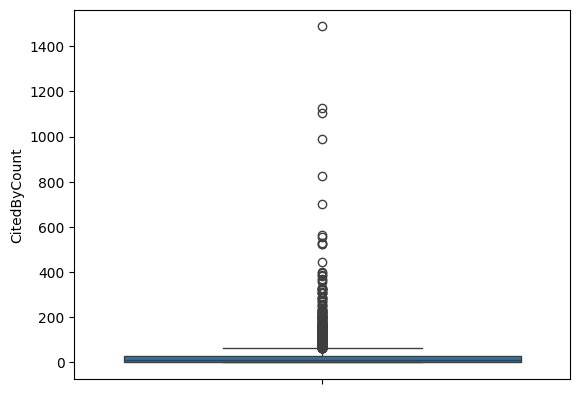

In [66]:
import seaborn as sns
sns.boxplot(result_df['CitedByCount'])

In [96]:
result_df

,Year,Title,PublicationName,CitedByCount,AuthorKeywords,Asia,Europe,Oceania,North America,South America,Africa,Unknown
0,2021,Does proactive logistics management enhance business management? Czy proaktywne zarządzanie logistyką wzmacnia zarządzanie biznesem?,Polish Journal of Management Studies,0,"Business management,Firm size,Logistics awareness,Logistics management,Logistics strategies",5,0,0,0,0,0,0
1,2021,"Will There Ever Be Cure for Chronic, Life-Changing Colistin-Resistant Klebsiella pneumoniae in Urinary Tract Infection?",Frontiers in Medicine,3,"biofilm infections,chronic infection,chronic urinary infection,colistin-resistant,colistin-resistant Klebsiella pneumoniae,Klebsiella pneumoniae,urinary tract infection",8,2,1,0,0,0,0
2,2021,"Bacterial diversity and potential risk factors associated with Salmonella contamination of seafood products sold in retail markets in Bangkok, Thailand",PeerJ,6,"Escherichia coli,Risk factors,Salmonella enterica,Seafood,Vibrio",1,0,0,1,0,0,0
3,2021,Global Perspectives on Immunization Against SARS-CoV-2 During Pregnancy and Priorities for Future Research: An International Consensus Paper From the World Association of Infectious Diseases and Immunological Disorders,Frontiers in Immunology,9,"COVID-19,maternal immunization,maternal vaccination program,pregnant women,SARS-CoV-2",1,8,6,3,2,2,0
4,2021,Deep Learning Enables Prostate MRI Segmentation: A Large Cohort Evaluation With Inter-Rater Variability Analysis,Frontiers in Oncology,4,"deep attentive neural network,large cohort evaluation,prostate segmentation,qualitative evaluation,quantitative evaluation,volume measurement",2,1,0,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
90266,1981,"Synthesis of O,O-dialkyl-S-[benzoyl-(benzylidene amino)] dithiophosphorates and their inhibitory effect on acetyl-cholinesterase activity",Proceedings of the Indian Academy of Sciences - Chemical Sciences,0,"anti-acetylcholinesterase activity, antihookworm activity, O,O-Dialkyl dithiophosphoric acid, o/p-benzylidene amino benzoic acid",1,0,0,0,0,0,0
90267,2024,O-GlcNAc transferase congenital disorder of glycosylation (OGT-CDG): Potential mechanistic targets revealed by evaluating the OGT interactome,Journal of Biological Chemistry,2,"histone modification, intellectual disability, neurodevelopment, O-GlcNAc transferase (OGT), O-GlcNAcylation, O-linked N-acetylglucosamine (O-GlcNAc), post-translational modification (PTM), protein-protein interaction, transcription, transcription regulation",0,1,0,0,0,0,3
90268,2009,Selective hydrogenation of o-chloronitrobenzene (o-CNB) over supported Pt and Pd catalysts obtained by laser vaporization deposition of bulk metals,Journal of Molecular Catalysis A: Chemical,52,"Laser vaporization deposition, Liquid phase hydrogenation, o-Chloronitrobenzene, Palladium, Platinum",1,0,0,0,0,0,0
90269,2024,"Efficient and safe extraction of an antioxidant, 3,5,4’-trihydroxy-6,7-methylenedioxyflavone-3-O-glycoside, from indigo leaves using alkaline hydrolysis of modifying ester moieties",Food Science and Technology Research,0,"3, 4'-trihydroxy-6, 5, 7-methylenedioxyflavone, alkaline water extraction, antioxidant, flavonol-O-glycosides, indigo plant, lipid peroxidation, β-carotene bleaching activity",1,0,0,0,0,0,0


In [107]:
import pandas as pd
from sklearn.metrics import mean_squared_error
from autogluon.tabular import TabularPredictor
from sklearn.model_selection import train_test_split

# Assuming result_df is already loaded
result_df = result_df.sample(n=10000, random_state=999)

# Filter out rows with empty 'AuthorKeywords'

# Remove outliers from 'CitedByCount' column
Q1 = result_df['CitedByCount'].quantile(0.25)
Q3 = result_df['CitedByCount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
filtered_df = result_df[(result_df['CitedByCount'] >= lower_bound) & (result_df['CitedByCount'] <= upper_bound)]

# Select features and target
target = 'CitedByCount'  # Column to predict

# Drop rows with missing target values
filtered_df = filtered_df.dropna(subset=[target])

# Split the data into training and testing sets
train_data, test_data = train_test_split(filtered_df, test_size=0.2, random_state=42)

# Train AutoGluon model with Cross-Validation
predictor = TabularPredictor(label=target, problem_type='regression', eval_metric='mean_squared_error').fit(
    train_data,
)

leaderboard = predictor.leaderboard(test_data)
print(leaderboard)

# Get the best model and its score
best_model = leaderboard.iloc[0]
best_model_name = best_model['model']

print(f"Best Model: {best_model_name}")

# Predict on the test set using the best model
test_predictions = predictor.predict(test_data, model=best_model_name)

# Calculate Mean Squared Error on the test set
test_true_values = test_data[target]  # True values of the target
test_mse = mean_squared_error(test_true_values, test_predictions)

print(f"Mean Squared Error (MSE) for {best_model_name} on test set: {test_mse:.4f}")


No path specified. Models will be saved in: "AutogluonModels\ag-20241206_053221"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.5
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22635
CPU Count:          24
Memory Avail:       18.54 GB / 31.92 GB (58.1%)
Disk Space Avail:   148.41 GB / 464.27 GB (32.0%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competitions and benchmarks.
	presets='high'        

                  model  score_test   score_val         eval_metric  \
0            LightGBMXT -177.289651 -185.353589  mean_squared_error   
1   WeightedEnsemble_L2 -178.082326 -184.681835  mean_squared_error   
2              CatBoost -178.157559 -184.794809  mean_squared_error   
3              LightGBM -178.259331 -187.815360  mean_squared_error   
4               XGBoost -178.269475 -187.562199  mean_squared_error   
5       NeuralNetFastAI -180.100311 -185.593282  mean_squared_error   
6        NeuralNetTorch -183.457689 -189.367051  mean_squared_error   
7         LightGBMLarge -183.542257 -191.655275  mean_squared_error   
8       RandomForestMSE -186.071804 -196.481311  mean_squared_error   
9         ExtraTreesMSE -186.076454 -194.952160  mean_squared_error   
10       KNeighborsUnif -206.248188 -224.620844  mean_squared_error   
11       KNeighborsDist -210.468708 -229.126200  mean_squared_error   

    pred_time_test  pred_time_val   fit_time  pred_time_test_marginal  \
0  

In [108]:

# เปรียบเทียบ MSE ระหว่าง training set และ new test data
train_predictions = predictor.predict(train_data)
train_mse = mean_squared_error(train_data[target], train_predictions)

new_data = new_data_df.sample(n=5000, random_state=10)
new_predictions = predictor.predict(new_data)
new_mse = mean_squared_error(new_data[target], new_predictions)

print(f"Training MSE: {train_mse:.4f}")
print(f"New data MSE: {new_mse:.4f}")

Training MSE: 178.6766
New data MSE: 3309.2278


In [10]:
new_predict = result_df.sample(n=1000, random_state=42)
new_predictions = predictor.predict(new_predict, model='WeightedEnsemble_L2')

# แสดงผลลัพธ์ที่โมเดลพยากรณ์ได้
print("Predictions on new data:")
print(new_predictions)

# ถ้าข้อมูลใหม่มีค่าจริงของ target
if 'CitedByCount' in new_predict.columns:
    new_true_values = new_predict['CitedByCount']  # ค่าจริงของเป้าหมาย
    new_mse = mean_squared_error(new_true_values, new_predictions)
    print(f"Mean Squared Error (MSE) on new data: {new_mse:.4f}")

    # เปรียบเทียบกับ MSE ของ test set
    if new_mse > test_mse:
        print("The model may be overfitting to the training data.")
    else:
        print("The model performs well on unseen data.")

Predictions on new data:
64704    26.075506
773       3.650585
21115    11.035699
69242    15.222953
73413    16.406113
           ...    
16644     3.324787
84371    17.489799
23458     7.278829
59582    30.056120
82038    15.009027
Name: CitedByCount, Length: 1000, dtype: float32
Mean Squared Error (MSE) on new data: 2683.5255
The model may be overfitting to the training data.


In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split
from autogluon.tabular import TabularPredictor

# Filter out rows with empty 'AuthorKeywords'
result_df = result_df[result_df['AuthorKeywords'].str.strip() != ""]

# Select features and target
target = 'CitedByCount'  # คอลัมน์ที่ต้องการพยากรณ์

# Drop rows with missing target values
result_df = result_df.dropna(subset=[target])

# Split the data into training and testing sets
train_data, test_data = train_test_split(result_df, test_size=0.2, random_state=42)

# Train AutoGluon model (AutoGluon will handle text preprocessing automatically)
predictor = TabularPredictor(label=target, eval_metric='mean_squared_error').fit(train_data)

# Evaluate the model using the testing set
leaderboard = predictor.leaderboard(test_data)
print(leaderboard)


No path specified. Models will be saved in: "AutogluonModels\ag-20241205_184441"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.5
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22635
CPU Count:          24
Memory Avail:       13.09 GB / 31.92 GB (41.0%)
Disk Space Avail:   129.25 GB / 464.27 GB (27.8%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competitions and benchmarks.
	presets='high'        

                  model   score_test    score_val         eval_metric  \
0       RandomForestMSE -2282.111097 -1458.491643  mean_squared_error   
1              CatBoost -2337.235640 -1204.855610  mean_squared_error   
2         ExtraTreesMSE -2365.688199 -1366.155810  mean_squared_error   
3   WeightedEnsemble_L2 -2427.157004 -1107.000676  mean_squared_error   
4            LightGBMXT -2497.005805 -1189.790520  mean_squared_error   
5              LightGBM -2511.041513 -1236.285857  mean_squared_error   
6       NeuralNetFastAI -2626.020449 -1452.339982  mean_squared_error   
7        NeuralNetTorch -2706.903615 -1235.755643  mean_squared_error   
8         LightGBMLarge -2733.159288 -1339.457513  mean_squared_error   
9               XGBoost -2747.459568 -1485.636586  mean_squared_error   
10       KNeighborsDist -2886.225383 -1735.335600  mean_squared_error   
11       KNeighborsUnif -2892.351086 -1748.964640  mean_squared_error   

    pred_time_test  pred_time_val   fit_time  pred

In [9]:
# Fill NaN values in 'keywords_list' with an empty list
result_df['keywords_list'] = result_df['keywords_list'].apply(lambda x: x if isinstance(x, list) else [])

for cluster_id in range(n_clusters):
    print(f"Cluster {cluster_id}:")
    cluster_keywords = result_df[result_df['cluster'] == cluster_id]['keywords_list']
    flat_keywords = [keyword for sublist in cluster_keywords for keyword in sublist]
    top_keywords = pd.Series(flat_keywords).value_counts().head(10)
    print(top_keywords)

Cluster 0:
 Vitamin D                       4696
 N                               1309
 Vitamin D deficiency            1043
25-hydroxyvitamin D               983
 vitamin D                        969
 g-C<sub>3</sub>N<sub>4</sub>     845
 Photocatalysis                   810
 G-quadruplex                     701
 Hepatitis B virus                662
B cells                           633
Name: count, dtype: int64
Cluster 1:
 vitamin D               171
children                  83
cancer                    61
 Vitamin D                47
inflammation              40
adolescents               37
Thailand                  37
 vitamin D deficiency     36
depression                34
aging                     34
Name: count, dtype: int64
Cluster 2:
 vitamin D      108
apoptosis        80
autoimmunity     68
 B cells         66
biomarker        42
antibody         41
 N               39
antibodies       38
adsorption       32
antioxidant      31
Name: count, dtype: int64
Cluster 3:
1       

In [38]:
cluster_labels = {
    0: 'Sustainability and Diversity',
    1: 'Medical and Technological Advances',
    2: 'Cell Biology and Biochemistry',
    3: 'Materials Science and Taxonomy',
    4: 'Public Health and Epidemiology',
}

result_df['cluster_label'] = result_df['cluster'].map(cluster_labels)
value_counts = result_df['cluster_label'].value_counts()
result_df.rename(columns={'cluster_label': 'keyword_category'}, inplace=True)
print(value_counts)


cluster_label
Medical and Technological Advances    6902
Cell Biology and Biochemistry          920
Sustainability and Diversity           550
Public Health and Epidemiology         444
Materials Science and Taxonomy         165
Name: count, dtype: int64


In [39]:
result_df.head(5)

,Year,Title,PublicationName,CitedByCount,AuthorKeywords,Asia,Europe,Oceania,North America,Africa,South America,Unknown,keywords_list,embedding,cluster,keyword_category,keyword_category
0,2021,Does proactive logistics management enhance bu...,Polish Journal of Management Studies,0,"Business management,Firm size,Logistics awaren...",5,0,0,0,0,0,0,"[Business management, Firm size, Logistics awa...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1,Medical and Technological Advances,Medical and Technological Advances
1,2021,"Will There Ever Be Cure for Chronic, Life-Chan...",Frontiers in Medicine,3,"biofilm infections,chronic infection,chronic u...",8,2,1,0,0,0,0,"[biofilm infections, chronic infection, chroni...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1,Medical and Technological Advances,Medical and Technological Advances
2,2021,Bacterial diversity and potential risk factors...,PeerJ,6,"Escherichia coli,Risk factors,Salmonella enter...",1,0,0,1,0,0,0,"[Escherichia coli, Risk factors, Salmonella en...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1,Medical and Technological Advances,Medical and Technological Advances
3,2021,Global Perspectives on Immunization Against SA...,Frontiers in Immunology,9,"COVID-19,maternal immunization,maternal vaccin...",1,8,6,3,2,2,0,"[COVID-19, maternal immunization, maternal vac...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1,Medical and Technological Advances,Medical and Technological Advances
4,2021,Deep Learning Enables Prostate MRI Segmentatio...,Frontiers in Oncology,4,"deep attentive neural network,large cohort eva...",2,1,0,4,0,0,0,"[deep attentive neural network, large cohort e...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1,Medical and Technological Advances,Medical and Technological Advances


In [40]:
result_df.drop(columns="AuthorKeywords", inplace=True)
result_df.drop(columns="embedding", inplace=True)

result_df

,Year,Title,PublicationName,CitedByCount,Asia,Europe,Oceania,North America,Africa,South America,Unknown,keywords_list,cluster,keyword_category,keyword_category
0,2021,Does proactive logistics management enhance bu...,Polish Journal of Management Studies,0,5,0,0,0,0,0,0,"[Business management, Firm size, Logistics awa...",1,Medical and Technological Advances,Medical and Technological Advances
1,2021,"Will There Ever Be Cure for Chronic, Life-Chan...",Frontiers in Medicine,3,8,2,1,0,0,0,0,"[biofilm infections, chronic infection, chroni...",1,Medical and Technological Advances,Medical and Technological Advances
2,2021,Bacterial diversity and potential risk factors...,PeerJ,6,1,0,0,1,0,0,0,"[Escherichia coli, Risk factors, Salmonella en...",1,Medical and Technological Advances,Medical and Technological Advances
3,2021,Global Perspectives on Immunization Against SA...,Frontiers in Immunology,9,1,8,6,3,2,2,0,"[COVID-19, maternal immunization, maternal vac...",1,Medical and Technological Advances,Medical and Technological Advances
4,2021,Deep Learning Enables Prostate MRI Segmentatio...,Frontiers in Oncology,4,2,1,0,4,0,0,0,"[deep attentive neural network, large cohort e...",1,Medical and Technological Advances,Medical and Technological Advances
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8976,2022,A Systematic Review on Rhodomyrtus Tomentosa (...,International Journal of Pharmaceutical Scienc...,6,1,0,0,0,0,0,0,"[Anti-inflammatory, Antibiotic, Antimicrobia...",1,Medical and Technological Advances,Medical and Technological Advances
8977,2020,Modified sialic acids on mucus and erythrocyte...,Journal of Virology,34,0,0,0,1,0,0,0,"[Influenza, Mucus, Sialic acids]",1,Medical and Technological Advances,Medical and Technological Advances
8978,2021,A review on microbial products and their persp...,Biomolecules,37,1,0,0,0,0,0,2,"[Bacteriocins, Chlorellin, Filamentous fungi...",1,Medical and Technological Advances,Medical and Technological Advances
8979,2010,Negative regulation of gamma-aminobutyric acid...,Neural Regeneration Research,1,1,0,0,0,0,0,0,"[Calcium ion, Facial nerve injury, Facial nu...",1,Medical and Technological Advances,Medical and Technological Advances


In [41]:
list(result_df.columns)

['Year',
 'Title',
 'PublicationName',
 'CitedByCount',
 'Asia',
 'Europe',
 'Oceania',
 'North America',
 'Africa',
 'South America',
 'Unknown',
 'keywords_list',
 'cluster',
 'keyword_category',
 'keyword_category']

In [42]:
result_df = result_df.loc[:, ~result_df.columns.duplicated()]
list(result_df.columns)

['Year',
 'Title',
 'PublicationName',
 'CitedByCount',
 'Asia',
 'Europe',
 'Oceania',
 'North America',
 'Africa',
 'South America',
 'Unknown',
 'keywords_list',
 'cluster',
 'keyword_category']

In [44]:
result_df.shape

(8981, 14)

In [48]:
result_df['Unknown'].value_counts()

Unknown
0    8630
1     272
2      52
3      17
4       5
5       4
6       1
Name: count, dtype: int64

In [49]:
filtered_df = result_df[result_df['Unknown'] == 0]

In [50]:
filtered_df['Unknown'].value_counts()

Unknown
0    8630
Name: count, dtype: int64

In [52]:
filtered_df.drop(columns='Unknown', inplace=True)

C:\Users\Amphi\AppData\Local\Temp\ipykernel_1316\25066785.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.drop(columns='Unknown', inplace=True)


In [54]:
filtered_df.shape

(8630, 13)

In [53]:
filtered_df.head(5)

,Year,Title,PublicationName,CitedByCount,Asia,Europe,Oceania,North America,Africa,South America,keywords_list,cluster,keyword_category
0,2021,Does proactive logistics management enhance bu...,Polish Journal of Management Studies,0,5,0,0,0,0,0,"[Business management, Firm size, Logistics awa...",1,Medical and Technological Advances
1,2021,"Will There Ever Be Cure for Chronic, Life-Chan...",Frontiers in Medicine,3,8,2,1,0,0,0,"[biofilm infections, chronic infection, chroni...",1,Medical and Technological Advances
2,2021,Bacterial diversity and potential risk factors...,PeerJ,6,1,0,0,1,0,0,"[Escherichia coli, Risk factors, Salmonella en...",1,Medical and Technological Advances
3,2021,Global Perspectives on Immunization Against SA...,Frontiers in Immunology,9,1,8,6,3,2,2,"[COVID-19, maternal immunization, maternal vac...",1,Medical and Technological Advances
4,2021,Deep Learning Enables Prostate MRI Segmentatio...,Frontiers in Oncology,4,2,1,0,4,0,0,"[deep attentive neural network, large cohort e...",1,Medical and Technological Advances


In [55]:
filtered_df.to_csv('real_data.csv', index=False)